In [ ]:
pip install mplfinance

### Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


/Users/hq/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Read in the files 

In [5]:
oil=pd.read_csv('./data/oil_dfinal.csv')

In [6]:
tech=pd.read_csv('./data/tech_dfinal.csv')

In [7]:
events=pd.read_csv('./data/final_events.csv')

### Oil cleaning

In [8]:
oil['Date']=oil.Date.str[:10]

In [9]:
oil["Date"]=pd.to_datetime(oil['Date'])

In [10]:
oil.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Ticker                  object
dtype: object

In [11]:
oil

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2000-01-01,19.106632,20.728894,18.385627,20.413454,81519400,0.0,0.0,XOM
1,2000-01-08,20.233202,20.668809,19.902742,20.128056,50907000,0.0,0.0,XOM
2,2000-01-15,19.887721,20.638768,19.797595,20.428474,48975200,0.0,0.0,XOM
3,2000-01-22,20.533617,20.743910,18.956419,18.956419,54588400,0.0,0.0,XOM
4,2000-01-29,18.896334,20.398428,18.716083,19.437088,59887400,0.0,0.0,XOM
...,...,...,...,...,...,...,...,...,...
9717,2020-11-28,43.274048,45.192224,39.480325,45.183701,46884000,0.0,0.0,EOG
9718,2020-12-05,44.569884,47.698644,43.495707,45.695213,26584300,0.0,0.0,EOG
9719,2020-12-12,46.411327,46.615934,43.504226,44.135094,25400800,0.0,0.0,EOG
9720,2020-12-19,42.037889,43.683258,41.364395,42.285118,16140100,0.0,0.0,EOG


In [12]:
oil.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Ticker                  object
dtype: object

In [13]:
#drop columns not being used
to_drop=['Volume','Dividends','Stock Splits']
oil=oil.drop(columns=to_drop)

In [14]:
grouped_mean=oil.groupby('Ticker')['Open'].mean()

In [15]:
grouped_mean=grouped_mean.to_frame().reset_index()

In [16]:
grouped_mean

,Ticker,Open
0,BP,23.633116
1,COP,31.504059
2,CVX,53.907707
3,EOG,40.624724
4,MPC,35.828085
5,OXY,38.967548
6,PSX,61.434590
7,SHEL,31.995415
8,VLO,28.486521
9,XOM,43.574640


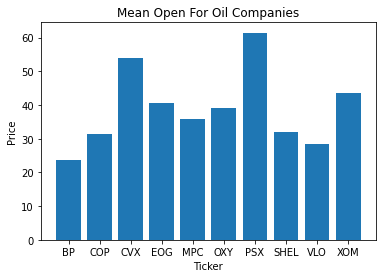

In [17]:
plt.bar('Ticker','Open',data=grouped_mean)
plt.title('Mean Open For Oil Companies')
plt.xlabel('Ticker')
plt.ylabel('Price')
plt.show()

In [18]:
oilb

NameError: name 'oilb' is not defined

In [19]:
events.Type

0            Accident – shipwreck
1                Tropical cyclone
2      Fire (urban conflagration)
3            Accident – coal mine
4            Accident – coal mine
                  ...            
966         Natural gas explosion
967              Tornado outbreak
968     Domestic Natural Disaster
969     Domestic Natural Disaster
970                     Terrorism
Name: Type, Length: 971, dtype: object

events.Fatalities=events.Fatalities.astype(int)


### Events cleaning 

In [ ]:
events=events.loc[(events['Year']>2000) & (events["Year"]<=2020)]

In [ ]:
events['Date']=pd.to_datetime(events['Date'])

In [ ]:
events=events[events['Date'].notnull()]

In [ ]:
events['Type']=events['Type'].str.replace('Domestic  Terrorism','Domestic Terrorism')


In [ ]:
events['Type']=events['Type'].str.replace('Domestic Terrorism ','Domestic Terrorism')

In [ ]:
index_to_drop=657

In [ ]:
events=events.drop(index=index_to_drop)

In [ ]:
events.Type=events['Type'].str.replace('Accident ','Accident')

In [ ]:
events=events.rename(columns={'Date':'Event_date'})


In [ ]:
events=events.loc[:,['Fatalities','Year','Article','Type','Location','Event_date']]

In [ ]:
events.Fatalities=events.Fatalities.str.replace('2,996','2996')

In [ ]:
events.Fatalities=events.Fatalities.astype(int)

In [ ]:
events['month']=events['Event_date'].dt.month

### cleaned events df

In [ ]:
events.dtypes

In [ ]:

events.Type

In [ ]:
events.Type.loc[events['Type']=='Terrorism']='Int Terrorsim'

In [ ]:
events.Type

events.Fatalities=events.Fatalities.astype(int)


In [ ]:
#events['Type']=events['Type'].str.replace('Terrorism','Non Domestic')

In [ ]:
events['Location']=events['Location'].str.replace('Sutherland Springs, Texas','Domestic')

In [20]:
events.Type

0            Accident – shipwreck
1                Tropical cyclone
2      Fire (urban conflagration)
3            Accident – coal mine
4            Accident – coal mine
                  ...            
966         Natural gas explosion
967              Tornado outbreak
968     Domestic Natural Disaster
969     Domestic Natural Disaster
970                     Terrorism
Name: Type, Length: 971, dtype: object

### Final Before event has occured

In [21]:




rolling_window_size = '7D'

oilb = pd.DataFrame()

# Iterate through each historical event
for index, event_row in events.iterrows():
    event_date = event_row['Event_date']
    
    # Calculate the date range for 7 days before the event
    date_range_start = event_date - pd.Timedelta(days=7)
    
    # Filter oil DataFrame for the specified date range
    filtered_data = oil[(oil['Date'] >= date_range_start) & (oil['Date'] <= event_date)]
    
    # Add the 'Event_date' and 'Type' columns from events DataFrame to each row
    filtered_data['Event_date'] = event_date
    filtered_data['Type'] = event_row['Type']
    
    # Append the filtered data to the oilb DataFrame
    oilb = pd.concat([oilb, filtered_data])




KeyError: 'Event_date'

In [22]:
oilb=oilb.reset_index()

In [23]:
oilb

,index


## Lets Dive

1. Retrieve the averages of industry through Types 5-7 days before the event has occurred.

In [24]:
av_oilb= oilb.groupby('Type').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'})

KeyError: 'Type'

2.Retrieve standard deviation industries before the event

In [25]:
sd_oilb=oilb.groupby('Type').agg({'Open':'std','High':'std','Low':'std','Close':'std'})

KeyError: 'Type'

In [26]:
av_oilb=av_oilb.reset_index()
av_oilb

NameError: name 'av_oilb' is not defined

In [ ]:
sd_oilb=sd_oilb.reset_index()
sd_oilb

- candlestick graph doesnt really tell us much, the dates are not relevant at all in this situation.

In [ ]:
import mplfinance as mpf

mpf.plot(oilb,type='candle',style='charles')

- compares the av_close and open price for oil industry as a whole before events with the average based off of groups

In [ ]:

# Create a new DataFrame with 'Type', 'Open', and 'Close' columns
type_open_close_df = oilb[['Type', 'Open', 'Close']]

# Melt the DataFrame to a long format for plotting
melted_df = type_open_close_df.melt(id_vars='Type', value_vars=['Open', 'Close'], var_name='Price Type', value_name='Price')

# Set the style of seaborn
sns.set(style="whitegrid")

# Define colors to match the bar plot colors
colors = ['blue', 'red']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', hue='Price Type', data=melted_df)

# Create the line plot with matching colors
sns.lineplot(x='Type', y='Price', hue='Price Type', data=melted_df, palette=colors)

plt.title('Comparison of Opening and Closing Prices by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Looks like the average doesnt fall too far out of line with groups.

In [ ]:


# Create a new DataFrame with 'Type', 'Open', and 'Close' columns
type_open_close_df = oilb[['Type', 'Open', 'Close']]

# Melt the DataFrame to a long format for plotting
melted_df = type_open_close_df.melt(id_vars='Type', value_vars=['Open', 'Close'], var_name='Price Type', value_name='Price')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', hue='Price Type', data=melted_df)

plt.title('Comparison of Opening and Closing Prices by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



- Finding the diff in average price change for opening and closing prices before event.

In [ ]:

oilb['Price Change'] = oilb['Close'] - oilb['Open']


average_changes = oilb.groupby('Type')['Price Change'].mean()

average_changes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named oilb with calculated 'Price Change' column

# Group by 'Type' and calculate the average of price changes
average_changes = oilb.groupby('Type')['Price Change'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")
sns.set_palette(color_palette)
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Type', y='Price Change', data=average_changes)

plt.title('Average Change in Opening and Closing Prices by Type')
plt.xlabel('Type')
plt.ylabel('Average Price Change')
plt.xticks(rotation=45)

# Invert the y-axis
ax.invert_yaxis()

plt.tight_layout()
plt.show()


-calculate percent change between close and opening price

In [ ]:

oilb['Percent Change'] = ((oilb['Close'] - oilb['Open']) / oilb['Open']) * 100


In [ ]:




# Group by 'Type' and calculate the average of percent changes
average_percent_changes = oilb.groupby('Type')['Percent Change'].mean().reset_index()

average_percent_changes


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named oilb with calculated 'Percent Change' column

# Group by 'Type' and calculate the average of percent changes
average_percent_changes = oilb.groupby('Type')['Percent Change'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")
sns.set_palette(color_palette)
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Type', y='Percent Change', data=average_percent_changes)

plt.title('Average Percent Change in Opening and Closing Prices by Type')
plt.xlabel('Type')
plt.ylabel('Average Percent Change (%)')
plt.xticks(rotation=45)

# Invert the y-axis
ax.invert_yaxis()


plt.tight_layout()
plt.show()


* we can see that our events that occur 5-7 days before event have the drop over 3% 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named sd_oilb with calculated standard deviations

# Define the colors to match the previous graphs
colors = ['blue', 'red']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Open', data=sd_oilb, color=colors[0], label='Open Price SD')
sns.barplot(x='Type', y='Close', data=sd_oilb, color=colors[1], label='Close Price SD')

plt.title('Standard Deviations of Open and Close Prices by Type')
plt.xlabel('Type')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


- above graph is showing sd of opening and closing prices. As we can see there is not votatlity between our prices.

### events after the event oil industry

In [ ]:
rolling_window_size = '7D'

oila = pd.DataFrame()

# Iterate through each historical event
for index, event_row in events.iterrows():
    event_date = event_row['Event_date']
    
    # Calculate the date range for 7 days after the event
    date_range_end = event_date + pd.Timedelta(days=7)
    
    # Filter oil DataFrame for the specified date range
    filtered_data = oil[(oil['Date'] > event_date) & (oil['Date'] <= date_range_end)]
    
    # Add the 'Event_date' and 'Type' columns from events DataFrame to each row
    filtered_data['Event_date'] = event_date
    filtered_data['Type'] = event_row['Type']
    
    # Append the filtered data to the oilb DataFrame
    oila = pd.concat([oila, filtered_data])

# Reset index of the resulting DataFrame
oila = oila.reset_index(drop=True)



In [ ]:
oila.columns

In [ ]:
av_oila= oila.groupby('Type').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'})

In [ ]:
sd_oila=oila.groupby('Type').agg({'Open':'std','High':'std','Low':'std','Close':'std'})

In [ ]:
av_oila=av_oila.reset_index()

In [ ]:
av_oila

In [ ]:
sd_oila=sd_oila.reset_index()
sd_oila

In [ ]:
# Create a new DataFrame with 'Type', 'Open', and 'Close' columns
type_open_close_dfa= oila[['Type', 'Open', 'Close']]

# Melt the DataFrame to a long format for plotting
melted_dfa = type_open_close_dfa.melt(id_vars='Type', value_vars=['Open', 'Close'], var_name='Price Type', value_name='Price')

# Set the style of seaborn
sns.set(style="whitegrid")

# Define colors to match the bar plot colors
colors = ['blue', 'red']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', hue='Price Type', data=melted_dfa)

# Create the line plot with matching colors
sns.lineplot(x='Type', y='Price', hue='Price Type', data=melted_dfa, palette=colors)

plt.title('Comparison of Opening and Closing Prices by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Create a new DataFrame with 'Type', 'Open', and 'Close' columns
type_open_close_df = oila[['Type', 'Open', 'Close']]

# Melt the DataFrame to a long format for plotting
melted_df = type_open_close_df.melt(id_vars='Type', value_vars=['Open', 'Close'], var_name='Price Type', value_name='Price')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', hue='Price Type', data=melted_df)

plt.title('Comparison of Opening and Closing Prices by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



-calculate percent change for after oil and difference in price

In [ ]:
oila['Price Change'] = oila['Close'] - oila['Open']

In [ ]:
oila['Percent Change'] = ((oila['Close'] - oila['Open']) / oila['Open']) * 100


In [ ]:
# Group by 'Type' and calculate the average of percent changes
average_percent_changesa = oila.groupby('Type')['Percent Change'].mean().reset_index()
aver
average_percent_changesa


In [ ]:
oila

#### effect size 

In [ ]:
oila

In [ ]:
oilb

In [ ]:
columns_to_use='Open'
mean_diff_oil=oila[columns_to_use].mean()-oilb[columns_to_use].mean()

In [ ]:
mean_diff_oil

In [ ]:
pooled_sd= np.sqrt((oilb[columns_to_use]**2+oila[columns_to_use]**2)/2)

In [ ]:
oila.shape

In [ ]:
oilb.shape

In [ ]:
oilb=oilb.drop(columns='Year')


In [ ]:
oila

In [ ]:
oilb

In [3]:
events.Type


NameError: name 'events' is not defined